# <center> Introduction to Python 3 </center>

<br>
<center>![2vs3](https://community-cdn-digitalocean-com.global.ssl.fastly.net/assets/tutorials/images/large/Python_2_vs_3.jpg?1480953022)</center>

# What's new 

- A lot more than you might realize.
- New syntax and keywords.
- Additions to existing standard library modules, packages, classes, and functions.
- A dozen completely new modules in the standard library.
- Reliability improvements that eliminate hidden race conditions, enhance security, remove deterministic but surprising behaviors,
- [https://docs.python.org/3/whatsnew/](https://docs.python.org/3/whatsnew/)

# Unicode and bytes

- In Python 2, str acts like bytes of data.

- There is also unicode type to represent Unicode strings.

- In Python 3, str is a string.

- bytes are bytes.

- There is no unicode. str strings are Unicode.

- from `__future__` import unicode_literals

In [11]:
# Unicode variable names (PEP 3131)

import math

def 加个派(fruit):
    """ 英文差，不用怕 """
    π = "派"
    return fruit + π

print(加个派("苹果"))

开心 = "😁"
print(开心)

# 😔 = "sad"    # 但是不能用 emoji 表情

苹果派
😁


In [3]:
""" Division
In Python 3, / is float division

In Python 2, / is integer division (assuming int inputs), 

In both 2 and 3, // is integer division
"""

print(3 / 2)    # python2 use "from __future__ import division"

1.5


In [ ]:
# Function annotations (Python 3.5 (PEP 484))

# Python doesn't do anything with the annotations other than put them in an
# __annotations__ dictionary.

def add(a: float, b: int = 1) -> float:
    """ 函数注解不作真正的类型检查，只是为 IDE 等工具提供方便，可以增强类型提示功能 """
    return a + b

add(42) 

print(add.__annotations__)

# 如果想实现真正的类型检查，可以尝试下 
# Mypy: Optional Static Typing for Python

from typing import Iterator
def fib(n: int) -> Iterator[int]:
    a, b = 0, 1
    while a < n:
        yield a
        a, b = b, a + b

print(list(fib(10)))

In [ ]:
# Streamlined super()

import json
class Config(object):
    def __init__(self, config_dict):
        self.data = config_dict

class ClientConfig(Config):
    def __init__(self, json_config_file):
        with open(json_config_file) as fh:
            data = json.load(fh)
        super(ClientConfig, self).__init__(data)
        
class ClientConfig(Config):
    def __init__(self, json_config_file):
        with open(json_config_file) as fh:
            data = json.load(fh)
        super().__init__(data)  # <---- Shorter!

In [2]:
# Feature: Advanced unpacking

a, b, *rest = range(10)
print('a:', a)    # print 在 python 3 中成为函数
print('b:', b)
print('rest:', rest)

a, *rest, b = range(10) 
print('a:', a)
print('b:', b)
print('rest:', rest)
 
*rest, b = range(10)
print('rest:', rest)

with open("./2vs3.ipynb") as f:
    # 这样我们可以很 happy 地获取一个文件的首尾行
    first, *_, last = f.readlines()
    
dict1 = {'a':1, 'b': 2}
dict2 = {'a':3, 'c': 4}
print({**dict1})
print({**dict1, **dict2})    # 合并两个字典

a: 0
b: 1
rest: [2, 3, 4, 5, 6, 7, 8, 9]
a: 0
b: 9
rest: [1, 2, 3, 4, 5, 6, 7, 8]
rest: [0, 1, 2, 3, 4, 5, 6, 7, 8]
{'b': 2, 'a': 1}
{'b': 2, 'c': 4, 'a': 3}


In [ ]:
# Feature: Keyword only arguments

def f(a, b, *, option=True):
    # 一定程度上避免 **kwargs 的使用，兼容 api 
    pass

def sum(a, b, biteme=False):
    if biteme:
        shutil.rmtree('./')    # dangerous !!!
    else:
        return a + b
    
# sum(1, 2, 3)     # dangerous !!!

def sum(a, b, *, biteme=False):
    if biteme:
        shutil.rmtree('./')    # dangerous !!!
    else:
        return a + b
     
sum(1, 2, biteme=False)
sum(1, 2, False)    # 调用失败

In [ ]:
# Chained exceptions

import shutil

def mycopy(source, dest):
    try:
        shutil.copy2(source, dest)
    except OSError:  # python2 里 raise 会丢失原来的 traceback 信息
        raise NotImplementedError("automatic sudo injection") from OSError
        
        
mycopy('old', 'new')


# Everything is an iterator

- In Python 3, range, zip, map, dict.values, etc. are all iterators. No xrange, dict.iteritems anymore.

- If you want a list, just wrap the result with list.

- Explicit is better than implicit.

- Harder to write code that accidentally uses too much memory, because the input was bigger than you expected.

In [ ]:
# No more comparison of everything to everything
# python2 里不同类型的值可以直接比较，结果比较诡异，同时可能会导致一些非预期结果

42 < '42' and None > 1    # python3 不再支持不同类型数据比较，避免隐藏错误

In [ ]:
# yield from

def gen():
    for i in range(10):
        yield i

def f():
    for i in gen():  # python2 
        yield i

def f2():
    yield from gen() # py3, easily refactor generators into subgenerators.
   
print(list(f()))
print(list(f2()))


def dup(n):
    for i in range(n):
        yield from (i, i)
        
print(list(dup(10)))

In [ ]:
# asyncio — Asynchronous I/O, event loop, coroutines and tasks (new in 3.4)
# https://docs.python.org/3/library/asyncio-task.html 

import asyncio
 
@asyncio.coroutine
def my_coroutine(task_name, seconds_to_sleep=3):
    print('{0} sleeping for: {1} seconds'.format(task_name, seconds_to_sleep))
    yield from asyncio.sleep(seconds_to_sleep)
    print('{0} is finished'.format(task_name))
 
loop = asyncio.new_event_loop()
asyncio.set_event_loop(loop)

tasks = [
    my_coroutine('task1', 4),
    my_coroutine('task2', 3),
    my_coroutine('task3', 2)
]
loop.run_until_complete(asyncio.wait(tasks))
loop.close()

In [ ]:
# aiohttp

import asyncio
import aiohttp
 
@asyncio.coroutine
def fetch_page(url):
    response = yield from aiohttp.request('GET', url)
    assert response.status == 200
    content = yield from response.read()
    print('URL: {0}:  Content-Length: {1}'.format(url, len(content)))
 
loop = asyncio.new_event_loop() 

asyncio.set_event_loop(loop)
tasks = [
    fetch_page('http://www.example.com'),
    fetch_page('http://www.baidu.com'),
    fetch_page('http://www.sohu.com'),
    fetch_page('http://www.douban.com'),
]
loop.run_until_complete(asyncio.wait(tasks))
loop.close()

In [ ]:
# python3.5 新增了 async/await 语法

import asyncio
import aiohttp
 
async def fetch_page(url):
    response = await aiohttp.request('GET', url)
    assert response.status == 200
    content = await response.read()
    print('URL: {0}  Content-Length: {1}'.format(url, len(content)))
 
loop = asyncio.new_event_loop()
asyncio.set_event_loop(loop)

tasks = [
    fetch_page('http://www.example.com'),
    fetch_page('http://www.baidu.com'),
    fetch_page('http://www.sohu.com'),
    fetch_page('http://www.douban.com'),
]
loop.run_until_complete(asyncio.wait(tasks))
loop.close()

# Standard library additions

- asyncio
- ipaddress
- functools.lru_cache
- enum
- pathlib
- mock
- concurrent.futures
- math.isclose    # compare float number
- lzma, for an improved compression compared to gzip
- the `__pycache__` directory, that helps to avoid littering every other project folder with .pyc files


# Can I use Python3

- 历史遗留问题，目前使用 python3 的项目比较少
- [http://py3readiness.org/](http://py3readiness.org/)，主流 python 库都已经支持 python3
- 上一个项目用了 python3.5.2 + flask 全家桶，生产环境未见坑
- Python 社区在 2020 年将停止维护 python2，社区正努力推进 python3
- Django, IPython 宣布不久将停止 python2 支持
- 新项目、小项目或者内部项目可以尝试下 python3
- Today, services built on Python 3.5 using asyncio are widely used at Facebook.

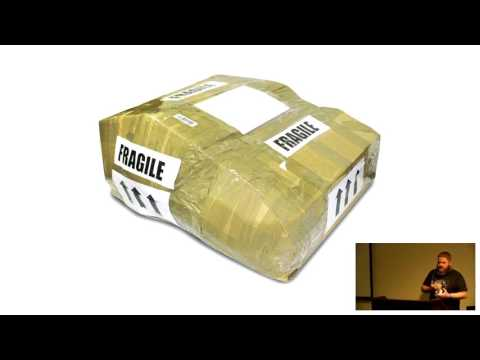

In [5]:
"""
Today, services built on Python 3.5 using asyncio are widely used at Facebook. 
But as recently as May of 2014 it was actually impossible to use Python 3 at Facebook. 
Come learn how we cut the Gordian Knot of dependencies and social aversion to the point where new services 
are now being written in Python 3 and existing codebases have plans to move to Python 3.5.
"""
from IPython.display import YouTubeVideo
YouTubeVideo('nRtp9NgtXiA')

# 编写 python2 和 python3 兼容代码

- 可以尝试编写 2 和 3 兼容代码保证代码迁移
- [six 模块](https://pythonhosted.org/six/)
- [2to3 代码转换工具](https://docs.python.org/2/library/2to3.html)

In [ ]:
import six

def dispatch_types(value):
    if isinstance(value, six.integer_types):
        handle_integer(value)
    elif isinstance(value, six.class_types):
        handle_class(value)
    elif isinstance(value, six.string_types):
        handle_string(value)


from six import with_metaclass

class Meta(type):
    pass

class Base(object):
    pass

class MyClass(with_metaclass(Meta, Base)):
    pass

# <center> Python3 大法好，退 Python2 保平安 </center>
<br>
<center>![2vs3](http://img.blog.csdn.net/20161222203627297?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQvbm9yYXdhbmdzaXl1/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/Center)</center>

# 参考链接

- [six](https://pythonhosted.org/six/)
- [2to3](https://docs.python.org/2/library/2to3.html)
- [diveintopython3](http://www.diveintopython3.net/)
- [What's New In Python 3.5](https://docs.python.org/3/whatsnew/3.5.html)
- [What's New In Python 3.6](https://docs.python.org/3/whatsnew/3.6.html)
- [What's REALLY New in Python 3](https://powerfulpython.com/blog/whats-really-new-in-python-3/)
- [Porting Code to Python 3 with 2to3](http://www.diveintopython3.net/porting-code-to-python-3-with-2to3.html)
- [Simple Python Version Management: pyenv](https://github.com/pyenv/pyenv)